In [1]:
import numpy as np  
import pandas as pd 


In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df = df.iloc[:, 1:]

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder


In [7]:
encoder = LabelEncoder()


In [8]:
df['Species'] = encoder.fit_transform(df['Species'])

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df = df[df['Species'] !=0][['SepalWidthCm', 'PetalLengthCm', 'Species']]

In [12]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt 

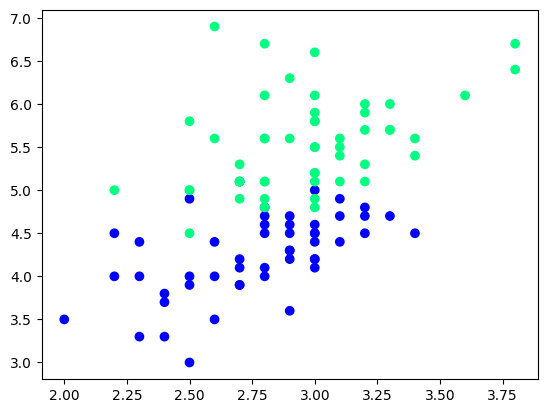

In [14]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [15]:
df

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [39]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60, :].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [17]:
df

,SepalWidthCm,PetalLengthCm,Species
63,2.9,4.7,1
96,2.9,4.2,1
77,3.0,5.0,1
90,2.6,4.4,1
100,3.3,6.0,2
...,...,...,...
68,2.2,4.5,1
107,2.9,6.3,2
89,2.5,4.0,1
87,2.3,4.4,1


In [19]:
df_train

,SepalWidthCm,PetalLengthCm,Species
94,2.7,4.2,1
88,3.0,4.1,1
145,3.0,5.2,2
102,3.0,5.9,2
129,3.0,5.8,2
106,2.5,4.5,2
142,2.7,5.1,2
80,2.4,3.8,1
138,3.0,4.8,2
66,3.0,4.5,1


In [20]:
df_val

,SepalWidthCm,PetalLengthCm,Species
126,2.8,4.8,2
148,3.4,5.4,2
109,3.6,6.1,2
112,3.0,5.5,2
55,2.8,4.5,1


In [21]:
df_test

,SepalWidthCm,PetalLengthCm,Species
89,2.5,4.0,1
119,2.2,5.0,2
51,3.2,4.5,1
93,2.3,3.3,1
149,3.0,5.1,2


In [22]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

#### Case-1 Bagging

In [29]:
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
66,3.0,4.5,1
102,3.0,5.9,2
94,2.7,4.2,1
102,3.0,5.9,2
138,3.0,4.8,2
145,3.0,5.2,2
94,2.7,4.2,1
88,3.0,4.1,1


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [31]:
dt_bag1 = DecisionTreeClassifier()


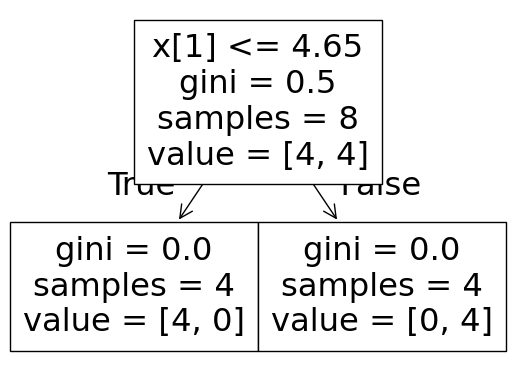

1.0


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


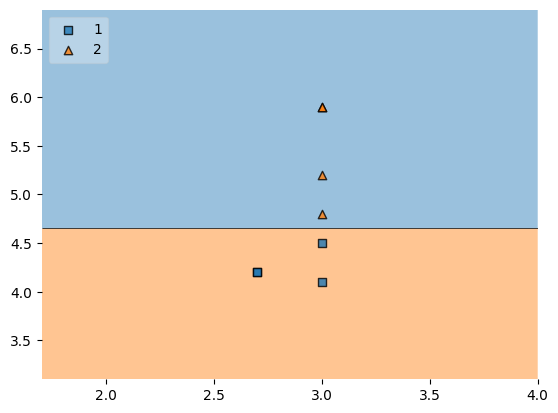

In [32]:
evaluate(dt_bag1,X,y)

In [36]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values,clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [37]:
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
137,3.1,5.5,2
137,3.1,5.5,2
121,2.8,4.9,2
108,2.5,5.8,2
79,2.6,3.5,1
121,2.8,4.9,2
59,2.7,3.9,1
93,2.3,3.3,1


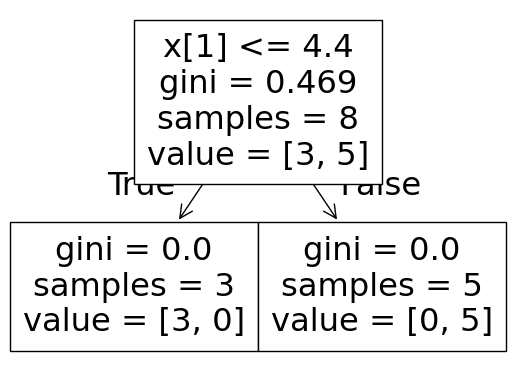

0.8


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


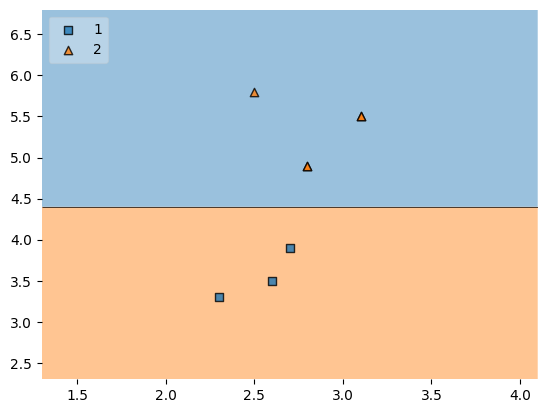

In [40]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

#### Predicition

In [41]:
df_test

,SepalWidthCm,PetalLengthCm,Species
120,3.2,5.7,2
131,3.8,6.4,2
109,3.6,6.1,2
59,2.7,3.9,1
102,3.0,5.9,2
